In [16]:
# Import
import os
import glob
import torch
import matplotlib.pyplot as plt
import pandas as pd
from hvs_hsi_pytorch.hs_image import HSImage

from hvs_hsi_pytorch.utils import hsi_utils, utils
from hvs_hsi_pytorch.definitions import DIR_DATA
from src.visualisation import show_simulation_comparison

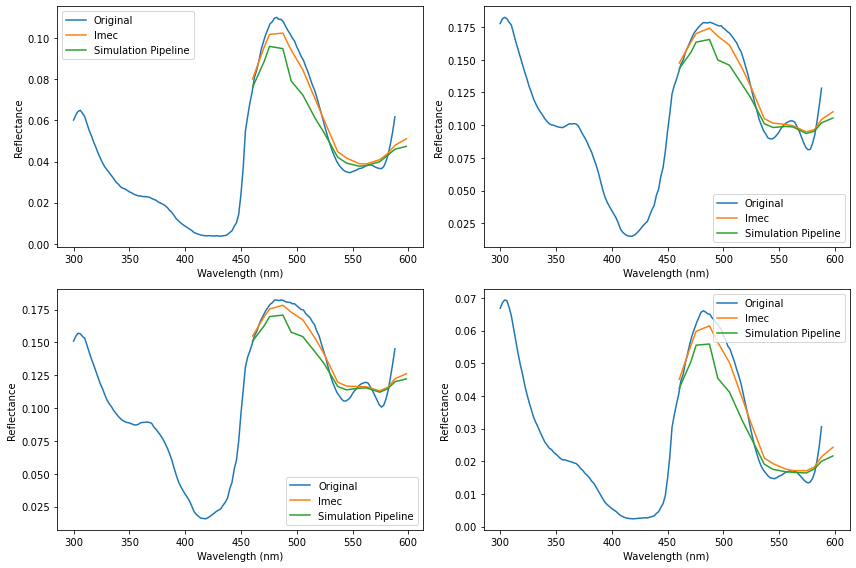

In [2]:
origin_file_path = os.path.join(DIR_DATA, "monte_carlo/dkfz/generic_train.csv")
simulated_file_path = "data/mc/generic_train_15.7.15.4_power_led_300.csv"
sensor = "imec 4x4-VIS-15.7.15.4"
show_simulation_comparison(origin_file_path, simulated_file_path, sensor)

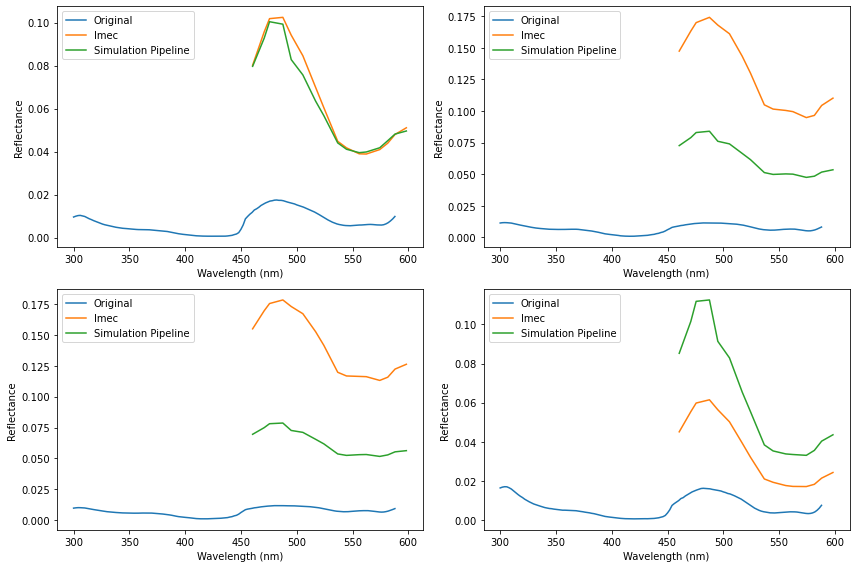

In [3]:
origin_file_path = os.path.join(DIR_DATA, "monte_carlo/dkfz/generic_train.csv")
simulated_file_path = "./data/mc/generic_train_15.7.15.4_power_led_300_norm_l1.csv"
sensor = "imec 4x4-VIS-15.7.15.4"
show_simulation_comparison(origin_file_path, simulated_file_path, sensor, l1=True)

In [ ]:
def show_spectrum_mean(origin_file_path, simulated_file_path, sensor, l1=True):
    df_origin = pd.read_csv(origin_file_path, skiprows=[0], usecols=list(range(26, 171)))
    wavelengths_origin = torch.tensor([eval(i.split('_')[-1]) * 1e9 for i in df_origin.columns.to_list()])

Text(0, 0.5, 'Reflectance')

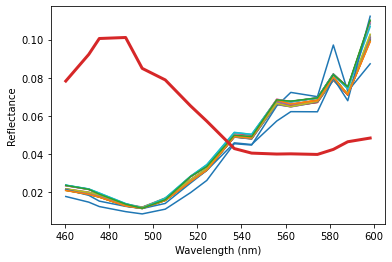

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

simulated_file_path = "data/mc/generic_train_15.7.15.4_power_led_300_norm_l1.csv"
df_simulation = pd.read_csv(simulated_file_path, usecols=list(range(24, 40)))
wavelengths_simulation = torch.tensor([eval(i.split('_')[-1]) for i in df_simulation.columns.to_list()])
reflectance_simulation = torch.tensor(df_simulation.to_numpy()[:, None], dtype=torch.float32)
reflectance_simulation = torch.swapaxes(reflectance_simulation, 0, 2)
reflectance_simulation = torch.swapaxes(reflectance_simulation, 1, 2)
hsi_image_simulation = HSImage(reflectance_simulation, wavelengths=wavelengths_simulation, camera=None)

white_path = "data/finger_data/session_001/exported_white_2022-07-15-20-29-45.png"
white = hsi_utils.load_sample(white_path)

img_files = glob.glob("data/finger_data/session_001/P010001_V03_iHSI_T01_2022-07-28-16-16-54/raw/*")
for i_files in range(len(img_files)):
    img_path = img_files[i_files]
    img = hsi_utils.load_frame(img_path)

    hsi_data = HSImage(array=img, wavelengths=None, camera="imec 4x4-VIS-15.7.15.4")
    hsi_data.reconstruct(white=white, dark=None, rho=15, method="flatfield")
    shape = hsi_data.array.shape
    hsi_data.array = hsi_data.array.reshape((shape[0], shape[1] * shape[2]))[:, :, None]
    hsi_data.array = utils.normalise_L1(hsi_data.array)

    axs.plot(hsi_data.wavelengths, torch.mean(torch.squeeze(hsi_data.array), dim=1))

axs.plot(hsi_image_simulation.wavelengths, torch.mean(torch.squeeze(hsi_image_simulation.array), dim=1), linewidth=3)
axs.set_xlabel('Wavelength (nm)')
axs.set_ylabel('Reflectance')

Text(0, 0.5, 'Reflectance')

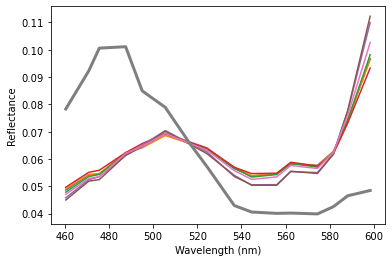

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

simulated_file_path = "data/mc/generic_train_15.7.15.4_power_led_300_norm_l1.csv"
df_simulation = pd.read_csv(simulated_file_path, usecols=list(range(24, 40)))
wavelengths_simulation = torch.tensor([eval(i.split('_')[-1]) for i in df_simulation.columns.to_list()])
reflectance_simulation = torch.tensor(df_simulation.to_numpy()[:, None], dtype=torch.float32)
reflectance_simulation = torch.swapaxes(reflectance_simulation, 0, 2)
reflectance_simulation = torch.swapaxes(reflectance_simulation, 1, 2)
hsi_image_simulation = HSImage(reflectance_simulation, wavelengths=wavelengths_simulation, camera=None)

white_path = "data/imgs/exported_white_2022-03-10-10-45-04.png"
white = hsi_utils.load_sample(white_path)

img_files = glob.glob("data/imgs/frames/*")
for i_files in range(len(img_files)):
    img_path = img_files[i_files]
    img = hsi_utils.load_sample(img_path)

    hsi_data = HSImage(array=img, wavelengths=None, camera="imec 4x4-VIS-15.7.15.4")
    hsi_data.calibrate(white=white)
    hsi_data.demosaic()
    hsi_data.correct()
    shape = hsi_data.array.shape
    hsi_data.array = hsi_data.array.reshape((shape[0], shape[1] * shape[2]))[:, :, None]
    hsi_data.array = utils.normalise_L1(hsi_data.array)

    axs.plot(hsi_data.wavelengths, torch.mean(torch.squeeze(hsi_data.array), dim=1))

axs.plot(hsi_image_simulation.wavelengths, torch.mean(torch.squeeze(hsi_image_simulation.array), dim=1), linewidth=3)
axs.set_xlabel('Wavelength (nm)')
axs.set_ylabel('Reflectance')